In [2]:

import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gastos_por_partido = []

with open('data/Ano-2025.json', 'r', encoding='utf-8') as file:
    response = json.load(file)
    data = response['dados']
    despesa_dict = {}
    for despesa in data:
        valorLiquido = despesa['valorLiquido']
        
        if despesa['siglaPartido'] == '':
            if despesa['nomeParlamentar'] in despesa_dict:
                despesa_dict[despesa['nomeParlamentar']] += float(valorLiquido)
            else:
                despesa_dict[despesa['nomeParlamentar']] = float(valorLiquido)
    gastos_por_partido.append(despesa_dict)

gastos_por_partidos_ordenados = []
for gasto in gastos_por_partido:
    gastos_ordenados = dict(sorted(gasto.items(), key=lambda item: item[1], reverse=True))    
    gastos_por_partidos_ordenados.append(gastos_ordenados)


print(gastos_por_partidos_ordenados)


[{'LIDERANÇA DO PT': 52091.38, 'LID.GOV-CD': 20523.58, 'LIDERANÇA DO PODEMOS': 14300.0, 'LIDERANÇA DO PSDB': 10418.0, 'LIDERANÇA DO PDT': 8244.0, 'LIDERANÇA DO PSD': 7792.0, 'LIDERANÇA DO UNIÃO BRASIL': 2732.1, 'LIDERANÇA DO PRD': 2200.0, 'LIDERANÇA DO PSOL': 912.88, 'LIDERANÇA DO REPUBLICANOS': 860.17}]


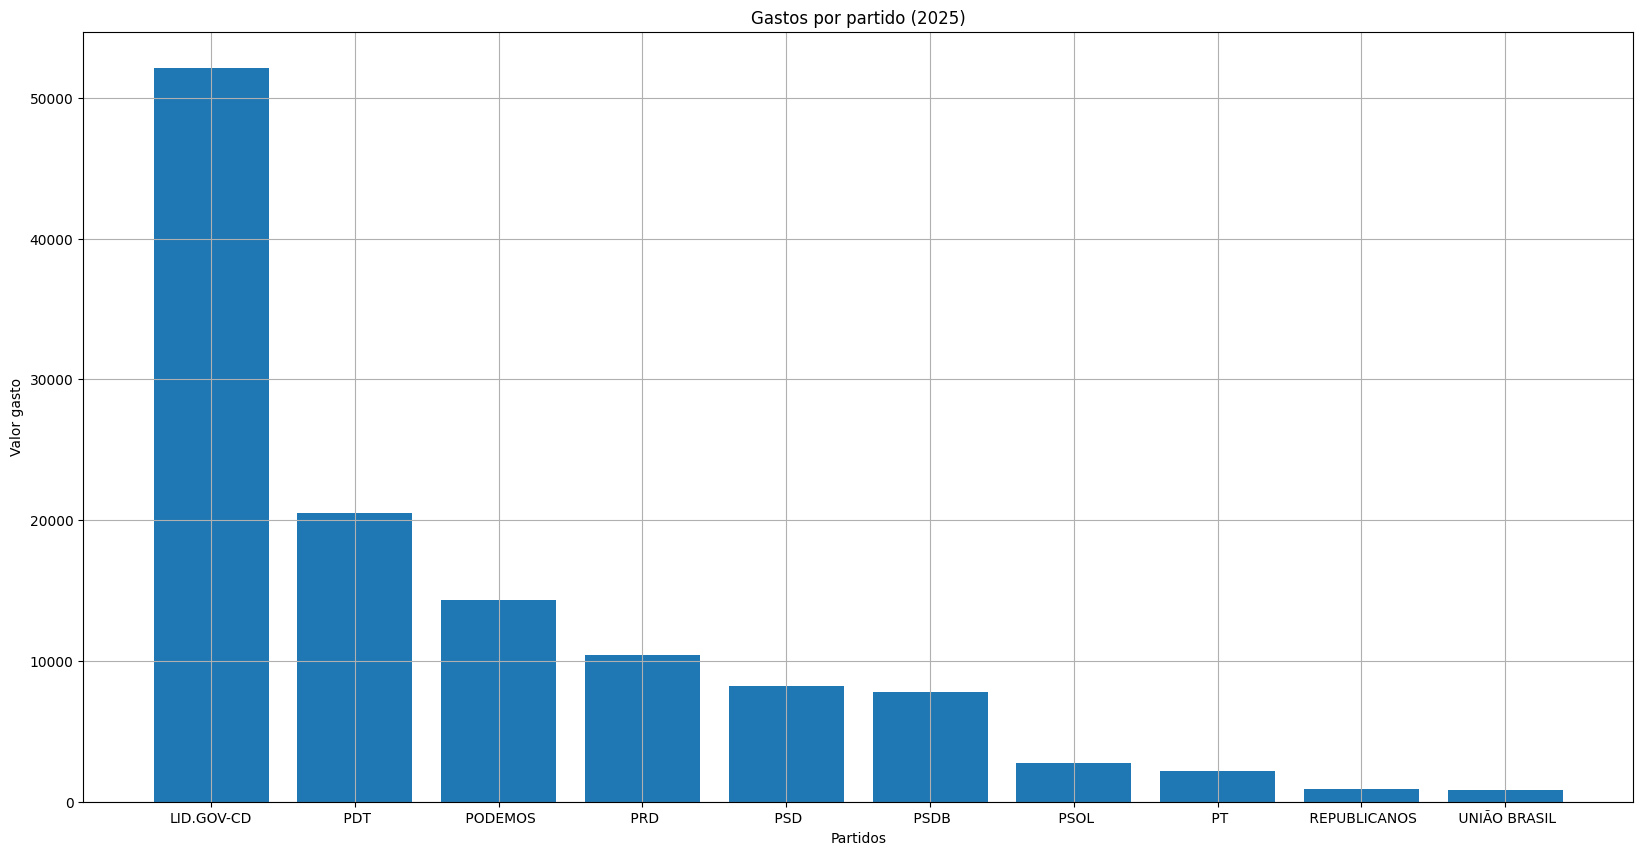

In [18]:

plt.figure(figsize=(20, 10))

gastos = gastos_por_partidos_ordenados[0]

partidos = list(gasto.keys())
partidos2 = [p.replace('LIDERANÇA DO', '') for p in partidos]
valores = list(gastos.values())
    
plt.bar(partidos2, valores,  label=partidos2)

plt.xlabel("Partidos")
plt.ylabel('Valor gasto')
plt.title("Gastos por partido (2025)")

plt.grid()

plt.show()